# This is project for image classification using Convilutional Neural Network

## Problem statment:
   Prediction of diffrent classes of images using CNN

## Data:   
   We are given with dataset with 6 type of classes from [kaggle](https://www.kaggle.com/puneet6060/intel-image-classification) from this we will train our cnn model and will test on given test set.
   This Data contains around 25k images of size 150x150 distributed under 6 categories.
* 'buildings' -> 0
* 'forest' -> 1
* 'glacier' -> 2
* 'mountain' -> 3
* 'sea' -> 4
* 'street' -> 5

There are around 14k images in Train, 3k in Test and 7k in Prediction.



### Import required tools

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
train_dir = "/content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/Data/seg_train"
test_dir = "/content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/Data/seg_test"

## Data preprocessing  

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range =0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                    validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)



In [70]:
train_set = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size = (150,150),
                                              class_mode="categorical",
                                              subset='training',
                                              batch_size=32)

val_set= train_datagen.flow_from_directory(directory=train_dir,
                                             target_size = (150,150),
                                              class_mode="categorical",
                                              subset='validation',
                                              batch_size=32 )

test_set = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (150,150),
                                            class_mode="categorical",
                                            batch_size=32,shuffle=False )
 

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## visualizing data

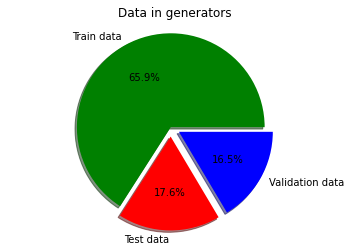

In [71]:
len_train_data = len(train_set.filenames)
len_test_data = len(test_set.filenames)
len_val_data = len(val_set.filenames)

labels = ['Train data', 'Test data', 'Validation data']
values = [len_train_data, len_test_data, len_val_data]
colors = ['green','red','blue']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, explode=(0, 0.1, 0.1))
plt.axis('equal')
plt.title('Data in generators')
plt.show()

# Now That our data is ready we can build Convolutional neural network


### First cnn layer

In [72]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, input_shape=(150,150,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))


### second CNN layer

In [73]:
model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation="relu",))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

### third CNN layer


In [74]:
model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2))

# flattening

In [75]:
model.add(tf.keras.layers.Flatten())

### 1st Dense layer

In [76]:
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))


### 2nd Dense layer 

In [77]:
model.add(tf.keras.layers.Dense(64,activation="relu"))

### output layer

In [78]:
model.add(tf.keras.layers.Dense(6,activation="softmax"))

## compile model

In [79]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics="accuracy"
               )

## Before fitting model we will define callback and earlystopping

In [80]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [81]:
early_stopping= EarlyStopping(monitor="val_loss",patience=3,verbose=1)

checkpoints = ModelCheckpoint("/content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/check_points",
                             monitor="val_loss",
                             verbose=1,
                             save_best_only=True)

callback_list = [early_stopping,checkpoints]

## Fit model on data

In [82]:
history1 =model.fit_generator( train_set,
                    epochs = 100,
                    validation_data= val_set,
                    verbose=1,
                    callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
351/351 [==============================] - 91s 258ms/step - loss: 1.3035 - accuracy: 0.4615 - val_loss: 0.8793 - val_accuracy: 0.6662

Epoch 00001: val_loss improved from inf to 0.87934, saving model to /content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/check_points
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/check_points/assets
Epoch 2/100
351/351 [==============================] - 90s 257ms/step - loss: 0.9071 - accuracy: 0.6533 - val_loss: 0.7206 - val_accuracy: 0.7225

Epoch 00002: val_loss improved from 0.87934 to 0.72057, saving model to /content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/check_points
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/check_points/assets
Epoch 3/100
351/351 [==============================] - 88s 251ms/step - loss: 0.7601 - accuracy: 0.7187 - val_loss: 0.6608 - v

In [56]:
train_set.dtype

'float32'

## Model Evaluation

In [83]:
model.evaluate(test_set, verbose=1)

94/94 [==============================] - 7s 71ms/step - loss: 0.4319 - accuracy: 0.8517


[0.43186986446380615, 0.8516666889190674]

##  visualization of results.
 **Notte**-to access history of model.fit - history1.history

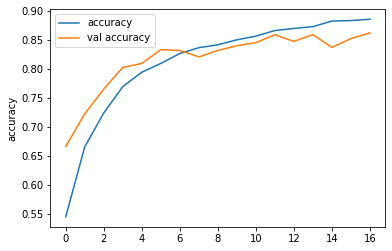

In [104]:

plt.plot(history1.history["accuracy"],label="accuracy")
plt.plot(history1.history["val_accuracy"],label="val accuracy")
plt.xlabel='epochs'
plt.ylabel("accuracy")
plt.legend()
plt.show()

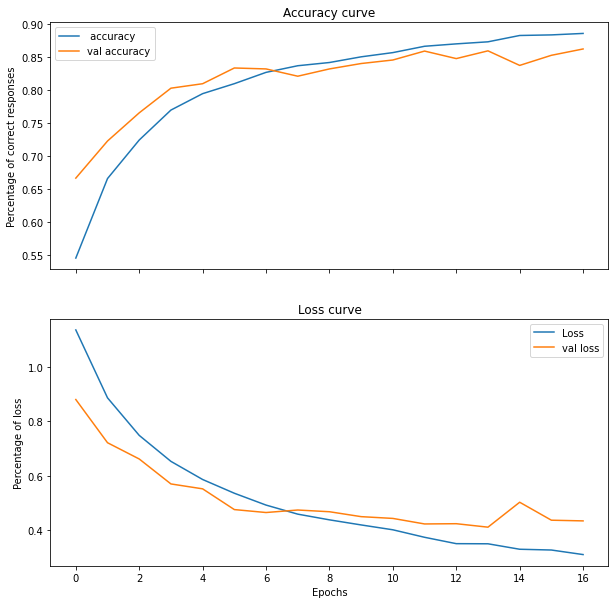

In [106]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

ax1.plot(history1.history["accuracy"], label=" accuracy")  # beause of label we will be able to give legend to perticular curve
ax1.plot(history1.history["val_accuracy"],label="val accuracy")
ax1.set(title="Accuracy curve", ylabel="Percentage of correct responses")
ax1.legend()

ax2.plot(history1.history['loss'], label="Loss") 
ax2.plot(history1.history['val_loss'], label="val loss")      
ax2.set(title="Loss curve", xlabel="Epochs",ylabel="Percentage of loss")
ax2.legend()


### Save model for reuse

In [108]:
model.save("/content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/Untitled Folder")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/Untitled Folder/assets


In [109]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine learning/Projects/Intel_image_classification/Untitled Folder")

In [110]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            